In [25]:
import missingno
import pandas as pd
from pathlib import Path

In [27]:
import matplotlib.pyplot as plt

In [7]:
data = Path('../data/raw/auctions.csv.gzip')
auctions = pd.read_csv(data, compression='gzip', parse_dates=['date'])

In [9]:
auctions.isna().sum().sum()

19571319

In [10]:
auctions.shape

(19571319, 7)

In [11]:
19571319 / (19571319 * 7)

0.14285714285714285

In [15]:
(19571319 * 7)

136999233

In [13]:
auctions.date.describe()

count                       19571319
unique                      19570963
top       2019-03-13 18:19:02.095780
freq                               2
first     2019-03-05 00:52:33.352526
last      2019-03-13 23:59:59.997032
Name: date, dtype: object

In [14]:
auctions

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0
5,NaN,6333597102633388268,2019-03-11 14:18:37.939485,1448534231953777480,1,1,0
6,NaN,6333597102633388268,2019-03-11 14:18:39.285471,7197160868095710320,1,1,0
7,NaN,6333597102633388268,2019-03-11 14:18:42.823963,160071254383181872,1,1,0
8,NaN,6333597102633388268,2019-03-11 14:18:43.587421,961481517958884390,1,1,0
9,NaN,6333597102633388268,2019-03-11 14:18:44.470248,2960551690927930513,1,1,0


In [16]:
auctions.country.nunique()

1

In [17]:
auctions.device_id.nunique()

206977

In [19]:
auctions.platform.value_counts()

1    15541825
2     4029494
Name: platform, dtype: int64

In [21]:
auctions = auctions.assign(date = lambda df: df.date.dt.floor('h').dt.tz_localize('UTC').dt.tz_convert('America/Montevideo'))

In [23]:
auctions.date.dt.floor('d').describe()

count                      19571319
unique                           10
top       2019-03-10 00:00:00-03:00
freq                        2950749
first     2019-03-04 00:00:00-03:00
last      2019-03-13 00:00:00-03:00
Name: date, dtype: object

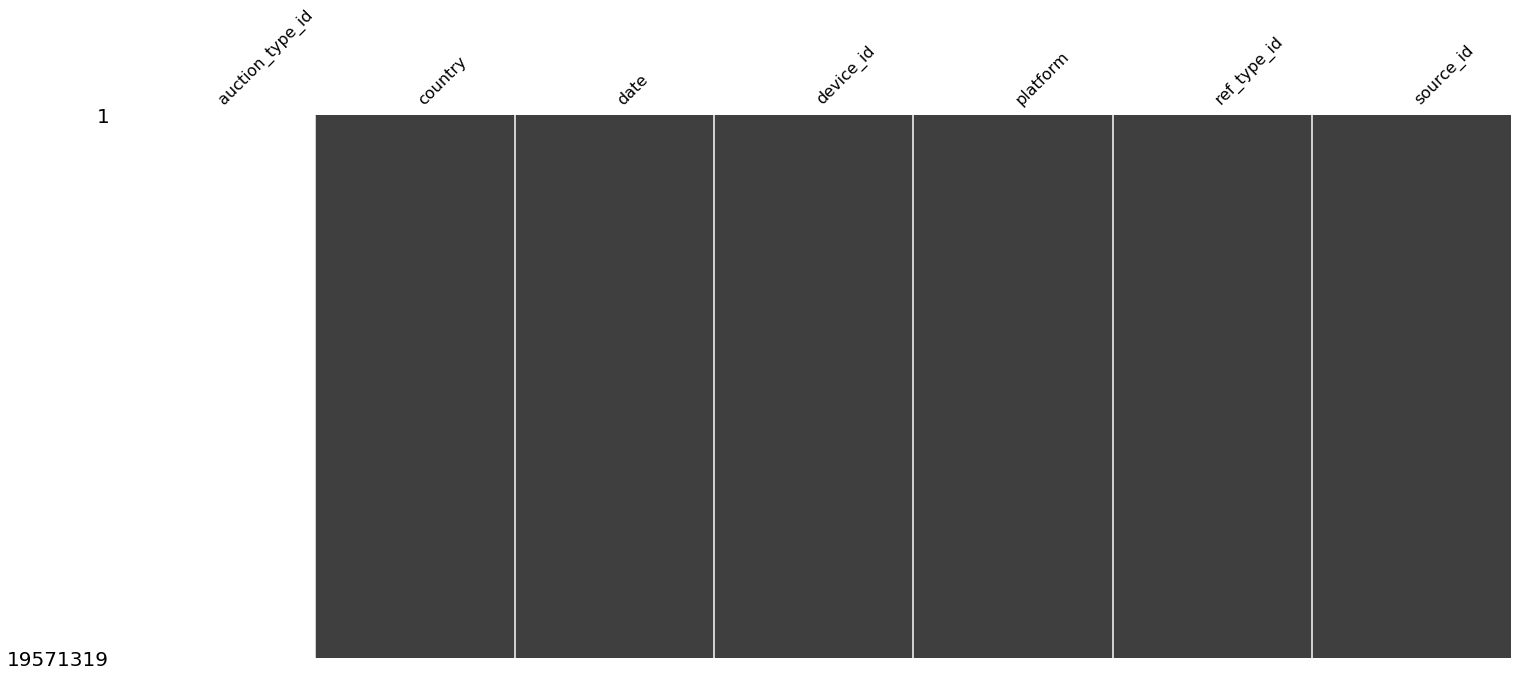

In [28]:
missingno.matrix(auctions, sparkline=False)
plt.savefig('../assets/auctions_missingno.png', bbox_inches='tight')

In [30]:
auctions.groupby(auctions.date.dt.date).size()

date
2019-03-04     345091
2019-03-05    1137010
2019-03-06     958504
2019-03-07    2282517
2019-03-08    2294273
2019-03-09    1897406
2019-03-10    2950749
2019-03-11    2503164
2019-03-12    2870704
2019-03-13    2331901
dtype: int64

In [31]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 11:00:00-03:00,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 11:00:00-03:00,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 11:00:00-03:00,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 11:00:00-03:00,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 11:00:00-03:00,1448534231953777480,1,1,0


In [32]:
auctions.ref_type_id.unique()

array([1, 7], dtype=int64)

In [33]:
auctions.platform.unique()

array([1, 2], dtype=int64)

In [34]:
auctions.source_id.unique()

array([0, 5, 6, 1, 2], dtype=int64)

In [35]:
pd.crosstab(auctions.platform, auctions.ref_type_id)

ref_type_id,1,7
platform,,
1,15541825,0
2,0,4029494


In [37]:
auctions.source_id.value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64